# This Notebook is part of section 6.3

## Import the Libraries

In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

## Fix the Path

In [8]:
os.chdir("D:")
os.getcwd()

'D:\\'

## Import the Dataset

In [10]:
grains=pd.read_csv('grains.csv',header=None)

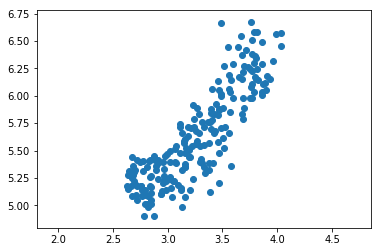

In [22]:
width = grains.loc[:,0]
length = grains.loc[:,1]
plt.scatter(width, length)
plt.axis('equal')
plt.show()

## Calculate the Correlation

In [24]:
correlation, pvalue = pearsonr(width, length)
print(correlation)

0.8604149377143467


## Create the Model

In [15]:
model = PCA()
pca_features = model.fit_transform(grains)

## Get the first 2 Components 

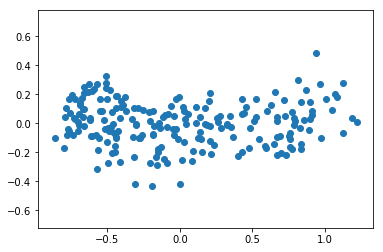

In [16]:
xs = pca_features[:,0]
ys = pca_features[:,1]
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [25]:
correlation, pvalue = pearsonr(xs, ys)
print(correlation)

1.7440866098723766e-16


## Plot the Components

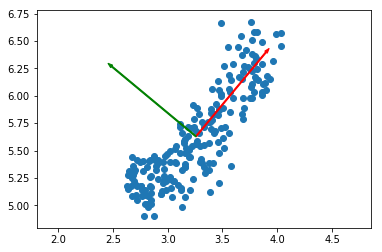

In [33]:
plt.scatter(grains.loc[:,0], grains.loc[:,1])
model = PCA()
model.fit(grains)
mean = model.mean_
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)
plt.axis('equal')
plt.show()

## Load the Dataset

In [34]:
df=pd.read_csv('fish.csv',header=None)
samples=df.loc[:,1:]
species=df.loc[:,0]

## Create a Pipeline

In [35]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(samples)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

## Plot the explained variances

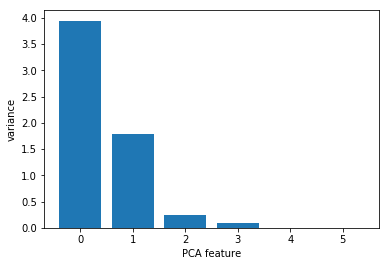

In [36]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()